## Descomposición de la serie temporal
Descompondremos los datos en tendencia, estacionalidad y ruido para entender qué queremos analizar.
Pero antes, preparamos los datos para su estudio.

In [23]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered
import warnings
warnings.filterwarnings(action="ignore")

import pandas as pd

import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [24]:
dateparse = lambda x: pd.datetime.strptime(x, '%d-%m-%Y')
df = pd.read_csv("Datos/ViajerosTren.csv", sep=";", parse_dates=['fecha'], date_parser=dateparse)
df = df.set_index('fecha')
df = df[['viajeros']]
df['viajeros'] = df['viajeros'].str.replace('.', '').astype(int)
df.head()

,viajeros
fecha,
2019-10-01,165980376
2019-07-01,139321325
2019-04-01,160348073
2019-01-01,161457841
2018-10-01,165269379


Text(0, 0.5, '# Pasajeros')

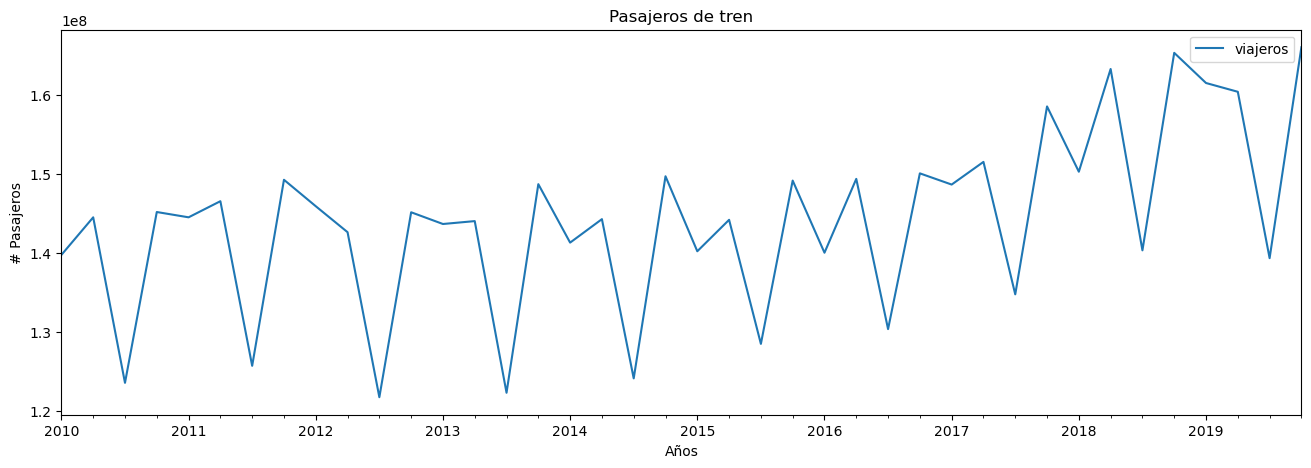

In [25]:
ax = df.plot(figsize=(16,5), title='Pasajeros de tren')
ax.set_xlabel("Años")
ax.set_ylabel("# Pasajeros")

Es estacional? Parece que sí. Veámoslo.

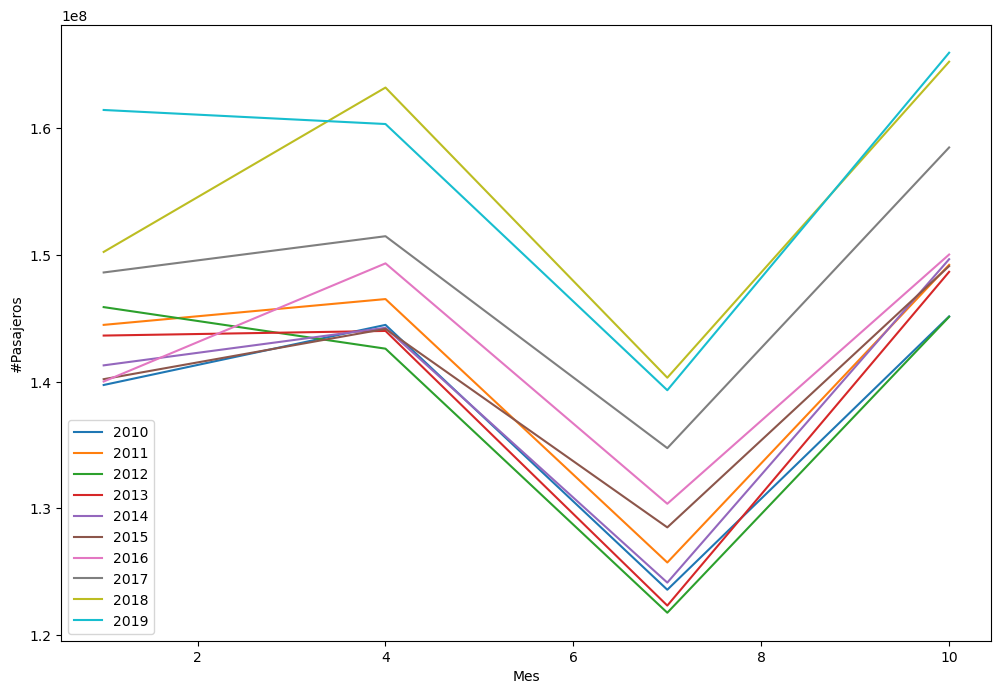

In [26]:
df['año'] = df.index.year
df['mes'] = df.index.month
df_pivot = pd.pivot_table(df, values='viajeros', index='mes', columns='año', aggfunc='mean')
df_pivot.plot(figsize=(12,8))
plt.legend()
plt.xlabel('Mes')
plt.ylabel('#Pasajeros')
plt.show()

Vemos como hay estacionalidad en los datos, pues en el tercer cuatrimestre descienden los viajes en tren. Por otro lado, no vemos una tendencia clara en la que aumenten los pasajeros año tras año, ya que en los primeros años no aumentan con el tiempo los pasajeros. Sí que aumentan en los últimos años. Pasamos ahora a descomponer la serie temporal y ver sus componentes.

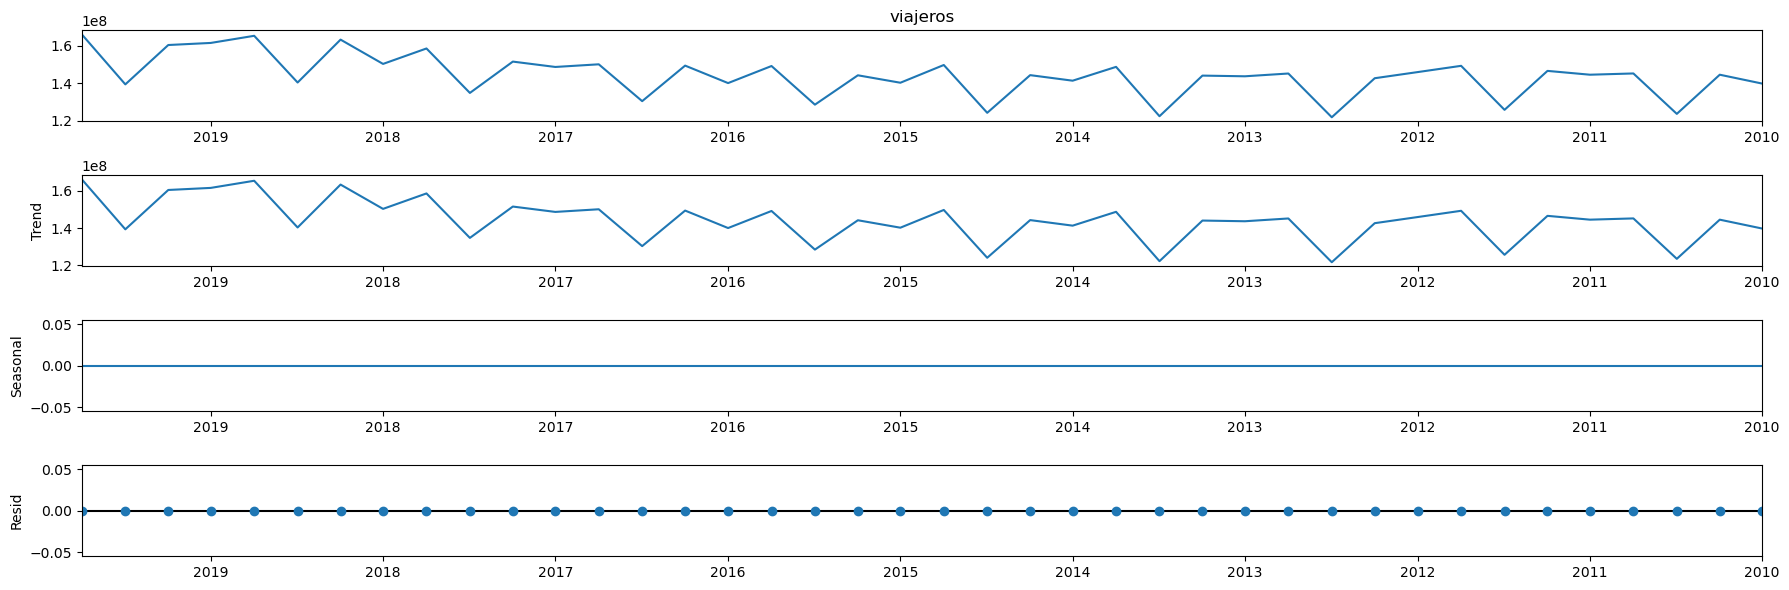

In [27]:
additive = seasonal_decompose(df['viajeros'], model='additive', period=1)

with plt.rc_context():
    plt.rc("figure", figsize=(18,6))
    additive.plot()
    plt.show()

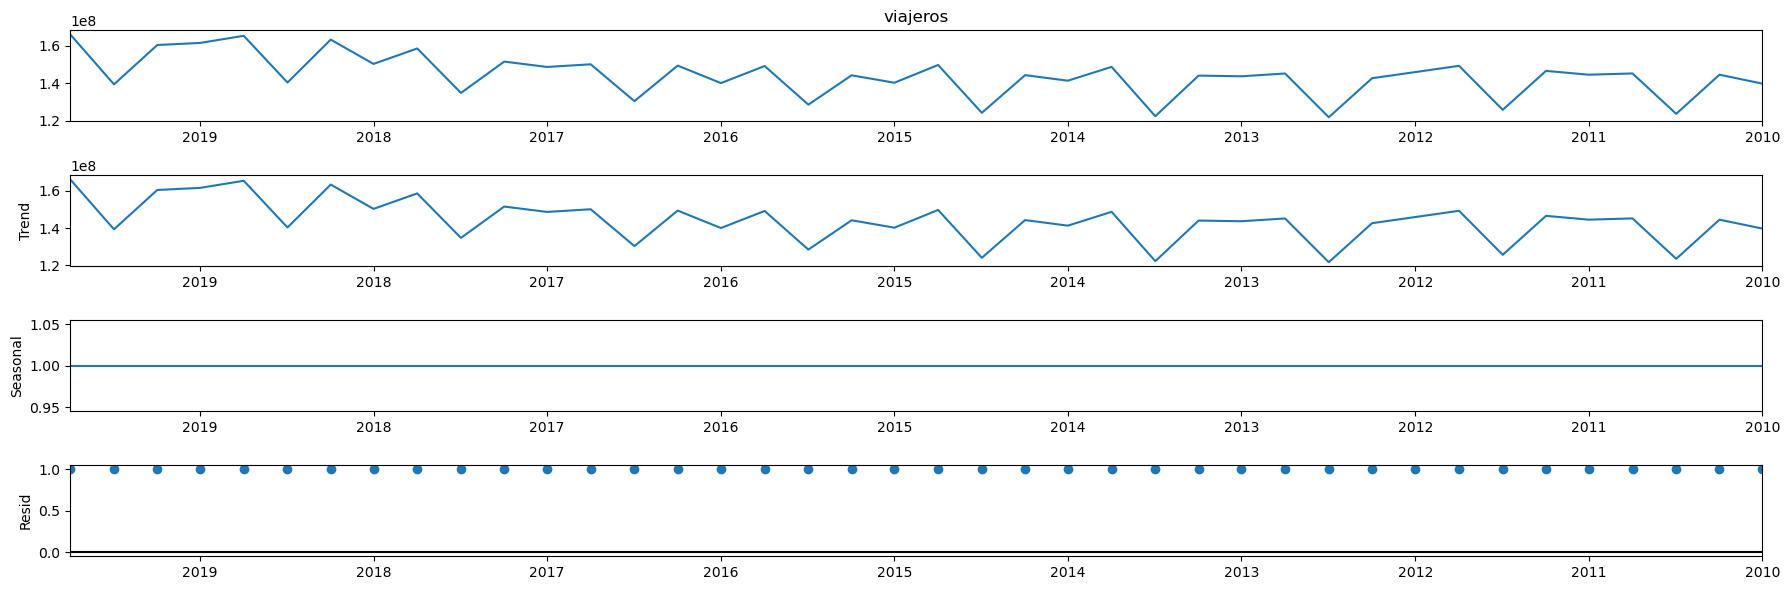

In [28]:
multiplicative = seasonal_decompose(df['viajeros'], model='multiplicative', period=1)

with plt.rc_context():
    plt.rc("figure", figsize=(18,6))
    multiplicative.plot()
    plt.show()